# **Customer Segmentation by RFM Analysis**

# Project Background

Project ini bertujuan melakukan analisis RFM pada data penjualan store fashion retail untuk mengelompokkan pelanggan berdasarkan unsur recency, frequency, dan monetary, serta mengidentifikasi pelanggan bernilai tinggi. Wawasan dan rekomendasi analisis ini diharapkan dapat meningkatkan strategi pemasaran, meningkatkan kepuasan pelanggan, dan mendongkrak penjualan.

# Column Descriptions

| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **Invoice ID** | Kode unik untuk setiap transaksi                                            |
| **Line**       | Nomor urut yang mewakili posisi produk dalam faktur                         |
| **Customer ID**| Kode unik untuk pelanggan yang melakukan pembelian                          |
| **Product ID** | Kode unik untuk produk yang dibeli                                          |
| **Size**       | Varian ukuran produk                                                        |
| **Color**      | Variasi warna produk                                                        |
| **Unit Price** | Harga satu unit produk sebelum diskon diterapkan                            |
| **Quantity**   | Jumlah unit produk yang dibeli dalam baris item faktur                      |
| **Date**       | Tanggal dan waktu transaksi                                                 |
| **Discount**   | Diskon diterapkan pada baris item                                           |
| **Line Total** | Total biaya untuk baris item setelah menerapkan diskon                      |
| **Store ID**   | Kode unik untuk toko tempat transaksi terjadi                               |
| **Employee ID**| Kode unik untuk karyawan yang memproses transaksi                           |
| **Currency**   | Kode mata uang ISO tiga huruf yang mewakili mata uang yang digunakan         |
| **Currency Symbol** | Simbol yang terkait dengan mata uang transaksi                        |
| **SKU**        | Kode inventaris unik yang menggabungkan ID Produk, Ukuran, dan Warna        |
| **Transaction Type** | Menentukan apakah transaksi tersebut adalah Penjualan atau Pengembalian |
| **Payment Method** | Metode yang digunakan untuk menyelesaikan transaksi                     |
| **Invoice Total** | Mengacu pada nilai total transaksi (ID Faktur)                           |
| **Sub Category** | Klasifikasi produk lebih spesifik dalam kategori                          |


# Import Libraries

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns

#Data Understanding

In [ ]:
# Membaca file CSV dataset.csv dari Google Drive
df=pd.read_csv('Global Fashion Retail_United States_Merge.csv')
df.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,...,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total,YearMonth,Sub Category
0,INV-US-001-03720753,1,278160,10854,M,TURQUOISE,68.0,1.0,2024-03-01 12:03:00,0.0,...,1.0,6.0,USD,$,MACO10854-M-TURQUOISE,Sale,Credit Card,68.0,2024-03,Coats and Blazers
1,INV-US-001-03720754,1,5323,9849,G,YELLOW,39.0,1.0,2024-03-01 14:24:00,0.0,...,1.0,5.0,USD,$,CHBA9849-G-YELLOW,Sale,Credit Card,39.0,2024-03,Baby (0-12 months)
2,INV-US-001-03720755,1,45533,9707,M,NaN,62.0,1.0,2024-03-01 17:29:00,0.0,...,1.0,12.0,USD,$,FESP9707-M-,Sale,Cash,62.0,2024-03,Sportswear
3,INV-US-001-03720756,1,2295,9284,S,RED,50.5,1.0,2024-03-01 11:41:00,0.0,...,1.0,13.0,USD,$,FESW9284-S-RED,Sale,Cash,50.5,2024-03,Sweaters and Knitwear
4,INV-US-001-03720757,1,14062,9402,38,NaN,65.5,1.0,2024-03-01 16:35:00,0.0,...,1.0,11.0,USD,$,MAPA9402-38-,Sale,Credit Card,65.5,2024-03,Pants and Jeans


In [ ]:
# Menampilkan informasi struktur dataframe seperti jumlah baris, kolom, tipe data, dan nilai non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554128 entries, 0 to 554127
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice ID        554128 non-null  object 
 1   Line              554128 non-null  int64  
 2   Customer ID       554128 non-null  int64  
 3   Product ID        554128 non-null  int64  
 4   Size              519030 non-null  object 
 5   Color             179702 non-null  object 
 6   Unit Price        554128 non-null  float64
 7   Quantity          554127 non-null  float64
 8   Date              554127 non-null  object 
 9   Discount          554127 non-null  float64
 10  Line Total        554127 non-null  float64
 11  Store ID          554127 non-null  float64
 12  Employee ID       554127 non-null  float64
 13  Currency          554127 non-null  object 
 14  Currency Symbol   554127 non-null  object 
 15  SKU               554127 non-null  object 
 16  Transaction Type  55

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik seperti count, mean, std, min, dan max.
df.describe()

,Line,Customer ID,Product ID,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Invoice Total
count,837884.000000,8.378840e+05,837884.000000,837884.000000,837884.000000,837884.000000,837884.000000,837884.000000,837884.000000,837884.000000
mean,1.582795,1.490309e+05,12573.486830,53.405771,1.099751,0.117108,45.967219,2.571954,27.835383,98.278910
std,1.155875,1.094061e+05,1885.042966,27.687564,0.395746,0.197718,43.623004,1.348461,16.423328,120.932697
min,1.000000,1.000000e+00,5985.000000,4.000000,1.000000,0.000000,-444.000000,1.000000,5.000000,-795.500000
25%,1.000000,6.773800e+04,11125.000000,34.000000,1.000000,0.000000,25.500000,1.000000,12.000000,34.000000
50%,1.000000,1.385350e+05,12721.000000,46.500000,1.000000,0.000000,40.000000,2.000000,23.000000,64.000000
75%,2.000000,2.268780e+05,13967.000000,66.000000,1.000000,0.250000,61.500000,4.000000,43.000000,136.000000
max,7.000000,1.642780e+06,17940.000000,152.500000,3.000000,0.600000,456.000000,5.000000,61.000000,1070.500000


In [ ]:
# Menampilkan dimensi dataframe, yaitu jumlah baris dan kolom dalam dataset df.
df.shape

(837884, 21)

#Data Preprocessing

##Convert Column

In [ ]:
# Mengonversi kolom Date ke format datetime agar dapat digunakan untuk analisis waktu seperti kohort atau tren bulanan.

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Menampilkan ringkasan struktur dataframe, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null di setiap kolom.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837884 entries, 0 to 837883
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice ID        837884 non-null  object        
 1   Line              837884 non-null  int64         
 2   Customer ID       837884 non-null  int64         
 3   Product ID        837884 non-null  int64         
 4   Size              784525 non-null  object        
 5   Color             271549 non-null  object        
 6   Unit Price        837884 non-null  float64       
 7   Quantity          837884 non-null  int64         
 8   Date              837884 non-null  datetime64[ns]
 9   Discount          837884 non-null  float64       
 10  Line Total        837884 non-null  float64       
 11  Store ID          837884 non-null  int64         
 12  Employee ID       837884 non-null  int64         
 13  Currency          837884 non-null  object        
 14  Curr

##Check Duplicate

In [ ]:
# Menghitung jumlah baris duplikat (yang persis sama) dalam dataframe df.
df.duplicated().sum()

np.int64(138)

In [ ]:
# Menghapus semua baris duplikat dari dataframe df secara permanen (langsung mengubah isi df).
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(837746, 21)

##Check Missing Value

In [ ]:
# Menghitung jumlah nilai yang hilang (missing/null) di setiap kolom dalam dataframe df.
df.isnull().sum()

,0
Invoice ID,0
Line,0
Customer ID,0
Product ID,0
Size,53347
Color,566227
Unit Price,0
Quantity,0
Date,0
Discount,0


In [ ]:
df.columns

Index(['Invoice ID', 'Line', 'Customer ID', 'Product ID', 'Size', 'Color',
       'Unit Price', 'Quantity', 'Date', 'Discount', 'Line Total', 'Store ID',
       'Employee ID', 'Currency', 'Currency Symbol', 'SKU', 'Transaction Type',
       'Payment Method', 'Invoice Total', 'YearMonth', 'Sub Category'],
      dtype='object')

In [ ]:
# Melakukan iterasi pada setiap kolom di dataframe df, lalu menampilkan nama kolom dan jumlah kemunculan (frekuensi) setiap nilai unik dalam kolom tersebut.
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Invoice ID =================


,count
Invoice ID,
RET-US-002-02028933,26
RET-US-001-03769490,20
RET-US-004-01463616,18
RET-US-001-03866597,18
RET-US-003-03946174,17
...,...
INV-US-002-01995428,1
INV-US-002-01995429,1
INV-US-002-01995430,1



============= Line =================


,count
Line,
1,593961
2,121514
3,60907
4,24750
5,18396
6,12192
7,6026



============= Customer ID =================


,count
Customer ID,
216945,43
28299,38
29381,37
105224,36
26227,35
...,...
267232,1
305032,1
310295,1



============= Product ID =================


,count
Product ID,
14339,315
12495,308
12782,304
12444,301
13848,300
...,...
8637,1
6800,1
6117,1



============= Size =================


,count
Size,
M,348466
S,127031
L,116743
38,41182
XL,37718
P,36749
XXL,20473
G,13669
36,12751



============= Color =================


,count
Color,
TURQUOISE,23918
BLUE,22038
SILVER,21740
LILAC,21383
NEUTRAL,20727
YELLOW,20366
WHITE,19901
BLACK,19523
RED,19213



============= Unit Price =================


,count
Unit Price,
42.0,10852
37.0,9511
40.0,9104
37.5,8860
38.0,8779
...,...
149.5,89
152.5,46
152.0,43



============= Quantity =================


,count
Quantity,
1,782170
3,27984
2,27592



============= Date =================


,count
Date,
2024-12-25 00:00:00,917
2024-12-22 00:00:00,751
2024-12-29 00:00:00,653
2024-12-28 00:00:00,611
2024-12-21 00:00:00,585
...,...
2024-12-11 12:29:00,1
2024-12-11 15:21:00,1
2024-12-11 09:38:00,1



============= Discount =================


,count
Discount,
0.00,608459
0.50,110374
0.35,35086
0.45,33937
0.25,15779
0.20,15538
0.40,14059
0.60,4514



============= Line Total =================


,count
Line Total,
42.0,7016
34.0,6512
39.0,6493
30.0,6492
37.0,6276
...,...
-58.6,1
-50.2,1
-32.6,1



============= Store ID =================


,count
Store ID,
1,238411
2,216208
4,161906
3,134954
5,86267



============= Employee ID =================


,count
Employee ID,
19,31205
21,31170
23,31061
18,30923
24,30647
22,30628
20,30574
8,26961
12,26705



============= Currency =================


,count
Currency,
USD,837746



============= Currency Symbol =================


,count
Currency Symbol,
$,837746



============= SKU =================


,count
SKU,
MASW14339-M-WHITE,213
MAPA13328-38-BLUE,204
MASW13741-M-GOLD,196
MASW13507-M-,196
MASW12155-M-GOLD,194
...,...
FEPA15294-46-,1
MASP17282-XL-,1
FELI16910-S-,1



============= Transaction Type =================


,count
Transaction Type,
Sale,793528
Return,44218



============= Payment Method =================


,count
Payment Method,
Credit Card,671084
Cash,166662



============= Invoice Total =================


,count
Invoice Total,
42.00,4258
39.00,3810
34.00,3804
30.00,3797
33.00,3681
...,...
-13.97,1
230.62,1
-135.53,1



============= YearMonth =================


,count
YearMonth,
2024-12,169341
2024-09,94523
2024-03,79145
2024-10,76200
2025-01,60730
2024-11,55882
2024-05,49115
2024-04,48161
2025-02,46527



============= Sub Category =================


,count
Sub Category,
Pants and Jeans,82316
Sportswear,80118
Coats and Blazers,80066
Accessories,53347
Shirts,51532
T-shirts and Polos,49407
Sweaters and Sweatshirts,46714
Suits and Blazers,42774
Dresses and Jumpsuits,42093


In [ ]:
# Mengisi nilai yang hilang (missing/null) di kolom Color dan Size dengan string 'UNKNOWN' agar tidak ada nilai kosong.

df['Color'] = df['Color'].fillna('UNKNOWN')
df['Size'] = df['Size'].fillna('UNKNOWN')

In [ ]:
df

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,...,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total,YearMonth,Sub Category
0,INV-US-001-03720753,1,278160,10854,M,TURQUOISE,68.0,1,2024-03-01 12:03:00,0.00,...,1,6,USD,$,MACO10854-M-TURQUOISE,Sale,Credit Card,68.00,2024-03,Coats and Blazers
1,INV-US-001-03720754,1,5323,9849,G,YELLOW,39.0,1,2024-03-01 14:24:00,0.00,...,1,5,USD,$,CHBA9849-G-YELLOW,Sale,Credit Card,39.00,2024-03,Baby (0-12 months)
2,INV-US-001-03720755,1,45533,9707,M,UNKNOWN,62.0,1,2024-03-01 17:29:00,0.00,...,1,12,USD,$,FESP9707-M-,Sale,Cash,62.00,2024-03,Sportswear
3,INV-US-001-03720756,1,2295,9284,S,RED,50.5,1,2024-03-01 11:41:00,0.00,...,1,13,USD,$,FESW9284-S-RED,Sale,Cash,50.50,2024-03,Sweaters and Knitwear
4,INV-US-001-03720757,1,14062,9402,38,UNKNOWN,65.5,1,2024-03-01 16:35:00,0.00,...,1,11,USD,$,MAPA9402-38-,Sale,Credit Card,65.50,2024-03,Pants and Jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837879,INV-US-005-04364229,1,296814,16558,M,UNKNOWN,69.5,1,2025-03-18 18:13:00,0.35,...,5,56,USD,$,CHGI16558-M-,Sale,Credit Card,45.18,2025-03,"Girl and Boy (1-5 years, 6-14 years)"
837880,INV-US-005-04364230,1,287630,16376,M,TURQUOISE,59.0,1,2025-03-18 08:34:00,0.35,...,5,61,USD,$,CHGI16376-M-TURQUOISE,Sale,Credit Card,38.35,2025-03,"Girl and Boy (1-5 years, 6-14 years)"
837881,INV-US-005-04364231,1,295675,17468,P,SILVER,68.5,1,2025-03-18 16:05:00,0.35,...,5,54,USD,$,CHGI17468-P-SILVER,Sale,Credit Card,44.52,2025-03,"Girl and Boy (1-5 years, 6-14 years)"
837882,INV-US-005-04364232,1,290609,16930,M,UNKNOWN,40.5,1,2025-03-18 09:19:00,0.35,...,5,57,USD,$,FESH16930-M-,Sale,Credit Card,26.32,2025-03,Shirts and Blouses


In [ ]:
#  Menghitung jumlah nilai kosong (null) di setiap kolom dataframe df.

df.isnull().sum()

,0
Invoice ID,0
Line,0
Customer ID,0
Product ID,0
Size,0
Color,0
Unit Price,0
Quantity,0
Date,0
Discount,0


##Check Outliers

In [ ]:
# Mengecek outlier untuk setiap kolom numerik di df menggunakan metode IQR

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df.loc[mask]

    print(f"{col}: {outliers.shape[0]} outliers ({100*outliers.shape[0]/df.shape[0]:.2f}%)")

Line: 61364 outliers (7.32%)
Customer ID: 3045 outliers (0.36%)
Product ID: 124 outliers (0.01%)
Unit Price: 31841 outliers (3.80%)
Quantity: 55576 outliers (6.63%)
Discount: 0 outliers (0.00%)
Line Total: 73672 outliers (8.79%)
Store ID: 0 outliers (0.00%)
Employee ID: 0 outliers (0.00%)
Invoice Total: 82326 outliers (9.83%)


Ditemukan outliers (nilai ekstrem) pada beberapa kolom, akan tetapi untuk analisis RFM keberadaan outliers ini masih penting, sehingga tidak dihilangkan.

#Cohort Analysis

In [ ]:
# Membuat kolom baru Order_Month dengan format bulan-tahun dari kolom Date menggunakan periode bulanan (Period[M]).

df['Order_Month'] = df['Date'].dt.to_period('M')

In [ ]:
# Menambahkan kolom Cohort yang berisi bulan pertama kali setiap pelanggan (Customer ID) melakukan transaksi, digunakan untuk analisis kohort.

df['Cohort'] = df.groupby('Customer ID')['Date'].transform('min').dt.to_period('M')

In [ ]:
df.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,...,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total,YearMonth,Sub Category,Order_Month,Cohort
0,INV-US-001-03720753,1,278160,10854,M,TURQUOISE,68.0,1,2024-03-01 12:03:00,0.0,...,USD,$,MACO10854-M-TURQUOISE,Sale,Credit Card,68.0,2024-03,Coats and Blazers,2024-03,2024-03
1,INV-US-001-03720754,1,5323,9849,G,YELLOW,39.0,1,2024-03-01 14:24:00,0.0,...,USD,$,CHBA9849-G-YELLOW,Sale,Credit Card,39.0,2024-03,Baby (0-12 months),2024-03,2024-03
2,INV-US-001-03720755,1,45533,9707,M,UNKNOWN,62.0,1,2024-03-01 17:29:00,0.0,...,USD,$,FESP9707-M-,Sale,Cash,62.0,2024-03,Sportswear,2024-03,2024-03
3,INV-US-001-03720756,1,2295,9284,S,RED,50.5,1,2024-03-01 11:41:00,0.0,...,USD,$,FESW9284-S-RED,Sale,Cash,50.5,2024-03,Sweaters and Knitwear,2024-03,2024-03
4,INV-US-001-03720757,1,14062,9402,38,UNKNOWN,65.5,1,2024-03-01 16:35:00,0.0,...,USD,$,MAPA9402-38-,Sale,Credit Card,65.5,2024-03,Pants and Jeans,2024-03,2024-03


In [ ]:
# Membuat tabel kohort yang berisi jumlah unik pelanggan (user_count) untuk setiap kombinasi bulan kohort dan bulan pesanan.

Cohort_Data = df.groupby(['Cohort', 'Order_Month']) \
              .agg(user_count=('Customer ID', 'nunique')) \
              .reset_index()

In [ ]:
Cohort_Data.head()

,Cohort,Order_Month,user_count
0,2024-03,2024-03,47940
1,2024-03,2024-04,6029
2,2024-03,2024-05,6124
3,2024-03,2024-06,4670
4,2024-03,2024-07,4779


In [ ]:
# Menambahkan kolom Period_Number yang menunjukkan bulan keberapa sejak pelanggan pertama kali bergabung (jarak antara Order_Month dan Cohort).

Cohort_Data['Period_Number'] = (Cohort_Data['Order_Month'].astype('int') - Cohort_Data['Cohort'].astype('int'))

In [ ]:
# Membuat matriks pivot kohort dengan baris Cohort, kolom Period_Number, dan nilai berupa jumlah pelanggan unik (user_count).

Cohort_Pivot = Cohort_Data.pivot_table(index='Cohort', columns='Period_Number', values='user_count')

In [ ]:
# Menampilkan tabel pivot kohort

Cohort_Pivot

Period_Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2024-03,47940.0,6029.0,6124.0,4670.0,4779.0,4931.0,10768.0,9100.0,6899.0,17094.0,7226.0,5694.0,5527.0
2024-04,24652.0,2971.0,2194.0,2329.0,2348.0,5224.0,4480.0,3307.0,8292.0,3555.0,2803.0,2695.0,NaN
2024-05,22031.0,2034.0,2001.0,2013.0,4479.0,3692.0,2849.0,7123.0,3057.0,2492.0,2313.0,NaN,NaN
2024-06,14656.0,1385.0,1327.0,2927.0,2359.0,1852.0,4599.0,1996.0,1551.0,1522.0,NaN,NaN,NaN
2024-07,13950.0,1247.0,2704.0,2170.0,1665.0,4203.0,1796.0,1424.0,1376.0,NaN,NaN,NaN,NaN
2024-08,13063.0,2539.0,2031.0,1517.0,3984.0,1540.0,1244.0,1208.0,NaN,NaN,NaN,NaN,NaN
2024-09,27211.0,4088.0,3033.0,7956.0,3354.0,2571.0,2505.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-10,18484.0,1984.0,5121.0,2065.0,1675.0,1554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11,11959.0,3202.0,1301.0,1009.0,973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mengambil kolom pertama dari pivot kohort sebagai ukuran awal tiap kohort (jumlah pelanggan saat bulan pertama).

Cohort_Size = Cohort_Pivot.iloc[:,0]

In [ ]:
# Menampilkan jumlah pelanggan pada bulan pertama untuk setiap kohort, yang digunakan sebagai acuan perhitungan retensi.

Cohort_Size

,0
Cohort,
2024-03,47940.0
2024-04,24652.0
2024-05,22031.0
2024-06,14656.0
2024-07,13950.0
2024-08,13063.0
2024-09,27211.0
2024-10,18484.0
2024-11,11959.0


In [ ]:
# Menghitung matriks retensi dengan membagi jumlah pelanggan di setiap periode dengan ukuran kohort awal untuk mendapatkan rasio retensi.

Retention_Matrix = Cohort_Pivot.divide(Cohort_Size, axis=0)

In [ ]:
# Menampilkan matriks retensi yang menunjukkan persentase pelanggan dari setiap kohort yang tetap aktif di bulan-bulan berikutnya.

Retention_Matrix

Period_Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2024-03,1.0,0.125761,0.127743,0.097413,0.099687,0.102858,0.224614,0.189821,0.143909,0.356571,0.150730,0.118773,0.11529
2024-04,1.0,0.120518,0.088999,0.094475,0.095246,0.211910,0.181730,0.134147,0.336362,0.144207,0.113703,0.109322,NaN
2024-05,1.0,0.092324,0.090827,0.091371,0.203304,0.167582,0.129318,0.323317,0.138759,0.113113,0.104988,NaN,NaN
2024-06,1.0,0.094501,0.090543,0.199713,0.160958,0.126365,0.313796,0.136190,0.105827,0.103848,NaN,NaN,NaN
2024-07,1.0,0.089391,0.193835,0.155556,0.119355,0.301290,0.128746,0.102079,0.098638,NaN,NaN,NaN,NaN
2024-08,1.0,0.194366,0.155477,0.116130,0.304984,0.117890,0.095231,0.092475,NaN,NaN,NaN,NaN,NaN
2024-09,1.0,0.150233,0.111462,0.292382,0.123259,0.094484,0.092058,NaN,NaN,NaN,NaN,NaN,NaN
2024-10,1.0,0.107336,0.277050,0.111718,0.090619,0.084073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11,1.0,0.267748,0.108788,0.084372,0.081361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


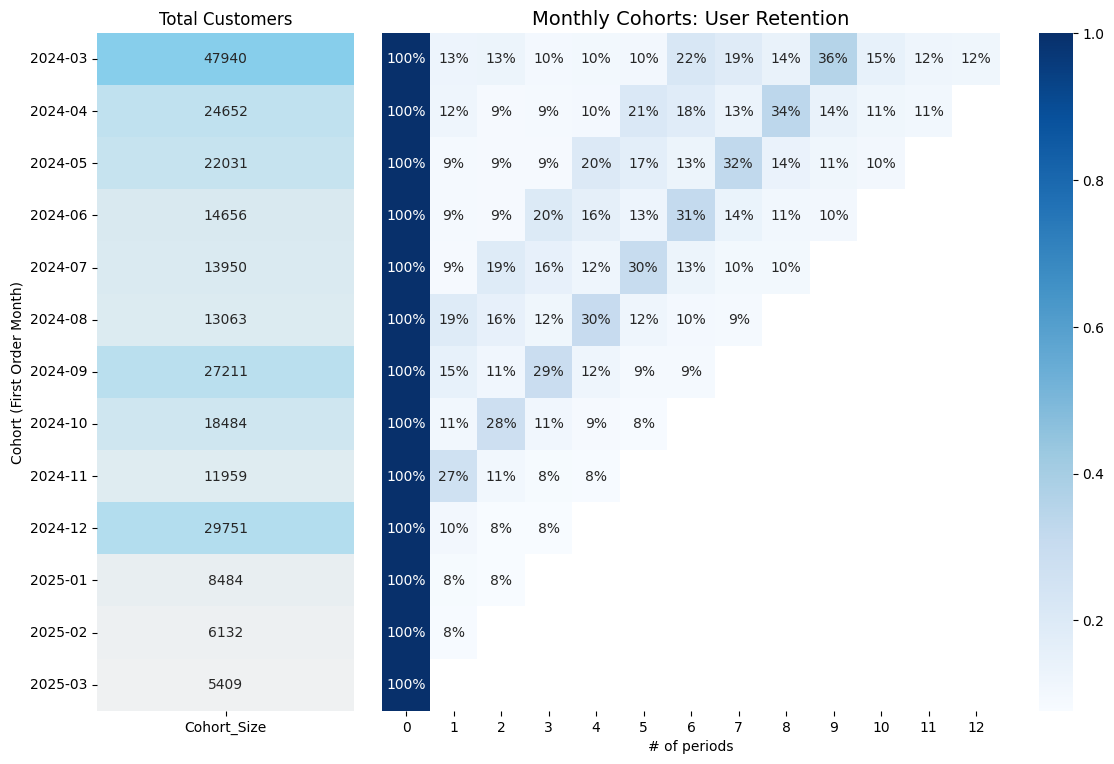

In [ ]:
# palette biru
cmap_blue = 'Blues'

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 3]})

# a. Cohort size (kiri)
Cohort_size_df = pd.DataFrame(Cohort_Size).rename(columns={0: 'Cohort_Size'})
sns.heatmap(
    Cohort_size_df,
    annot=True, cbar=False, fmt='g',
    cmap=sns.light_palette("skyblue", as_cmap=True),
    linewidths=0, ax=ax[0]
)
ax[0].set_ylabel('Cohort (First Order Month)')
ax[0].set_xlabel('')
ax[0].tick_params(left=True, labelleft=True)
ax[0].set_title('Total Customers')


# b. Retention matrix (kanan)
sns.heatmap(
    Retention_Matrix,
    mask=Retention_Matrix.isnull(),
    annot=True, fmt='.0%',
    cmap=cmap_blue,
    linewidths=0, ax=ax[1]
)
ax[1].set_title('Monthly Cohorts: User Retention', fontsize=14)
ax[1].set_xlabel('# of periods')
ax[1].set_ylabel('')
ax[1].tick_params(left=False, labelleft=False)

fig.tight_layout(pad=2.0)  # Adjust padding
plt.show()

# Save to Visualization

In [ ]:
df_visualization = df

In [ ]:
df_visualization.to_csv('df_visualization.csv', index=False)

RFM Analysis selanjutnya dilakukan dengan menggunakan Power BI.